In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('Display.max_columns',None)
sns.set_theme(color_codes=True)

In [ ]:
df=pd.read_csv('ford.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


# Data Preprocessing Part 1

In [ ]:
df.select_dtypes(include='object').nunique()

,0
model,24
transmission,3
fuelType,5


In [ ]:
df['model'].unique()

array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo', 'Focus'], dtype=object)

In [ ]:
df['fuelType'].value_counts()

,count
fuelType,
Petrol,12179
Diesel,5762
Hybrid,22
Electric,2
Other,1


In [ ]:
df['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [ ]:
def segment_cars(cars):
  cars_keywords={
    'compact_cars' : ['Fiesta', 'Focus', 'Puma', 'Ka+'],
    'suv_models' : ['Kuga', 'EcoSport', 'Edge'],
    'minivans' : ['C-MAX', 'S-MAX', 'B-MAX', 'Tourneo Custom', 'Tourneo Connect', 'Grand Tourneo Connect', 'Galaxy'],
    'luxury_cars' : ['Mustang'],
    'mid_size_sedan' : ['Mondeo', 'Fusion'],
    'compact_pickup_truck' : ['Ranger'],
    'other':[]
  }
  cars=cars.strip()

  for key,value in cars_keywords.items():
    if any(car in cars for car in value):
      return key
  return 'Other'

In [ ]:
df['segment_model']=df['model'].apply(segment_cars)
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,segment_model
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4,minivans
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0,minivans
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6,compact_cars
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2,Other
17965,Focus,2015,8299,Manual,5007,Petrol,22,57.7,1.0,compact_cars


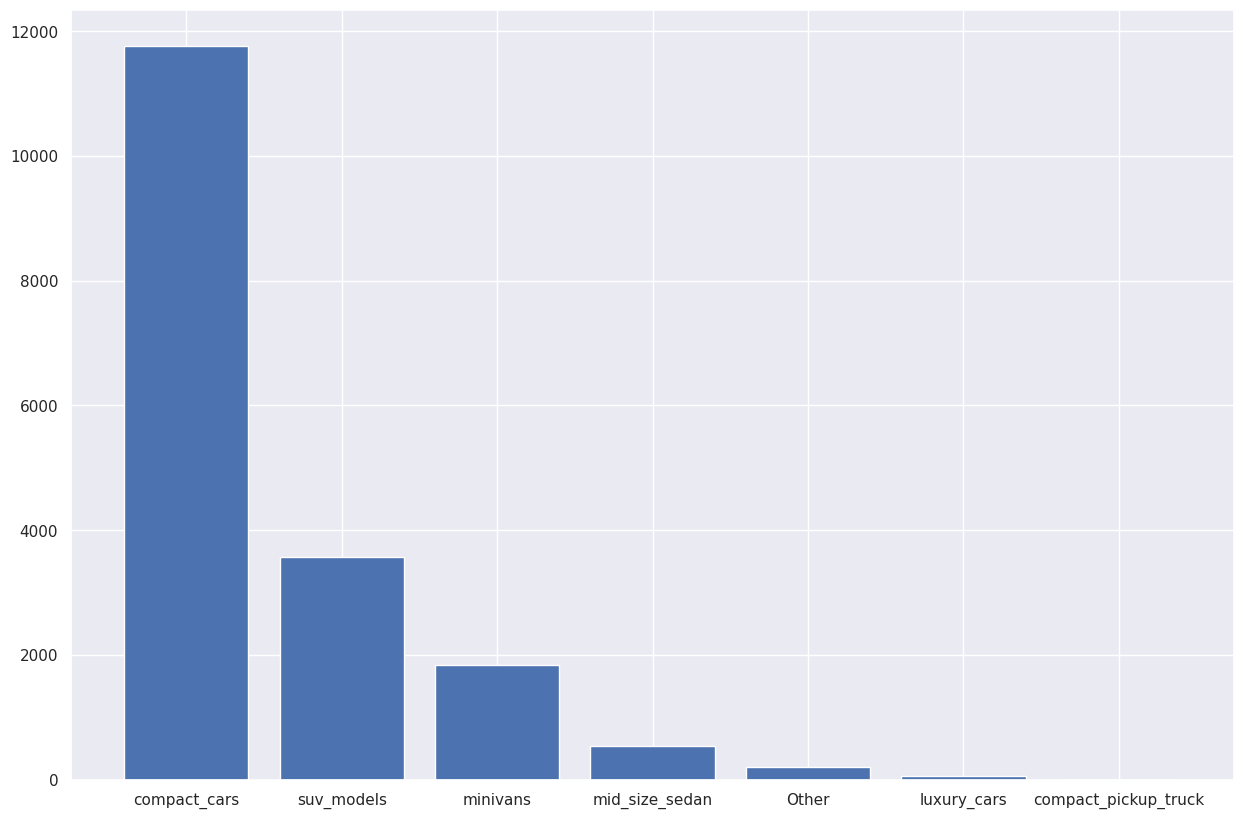

In [ ]:
sm=df['segment_model'].value_counts()
plt.figure(figsize=(15,10))
plt.bar(sm.index,sm.values)
plt.show()

# EDA

<ipython-input-173-3f71529feb06>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-173-3f71529feb06>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
<ipython-input-173-3f71529feb06>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)


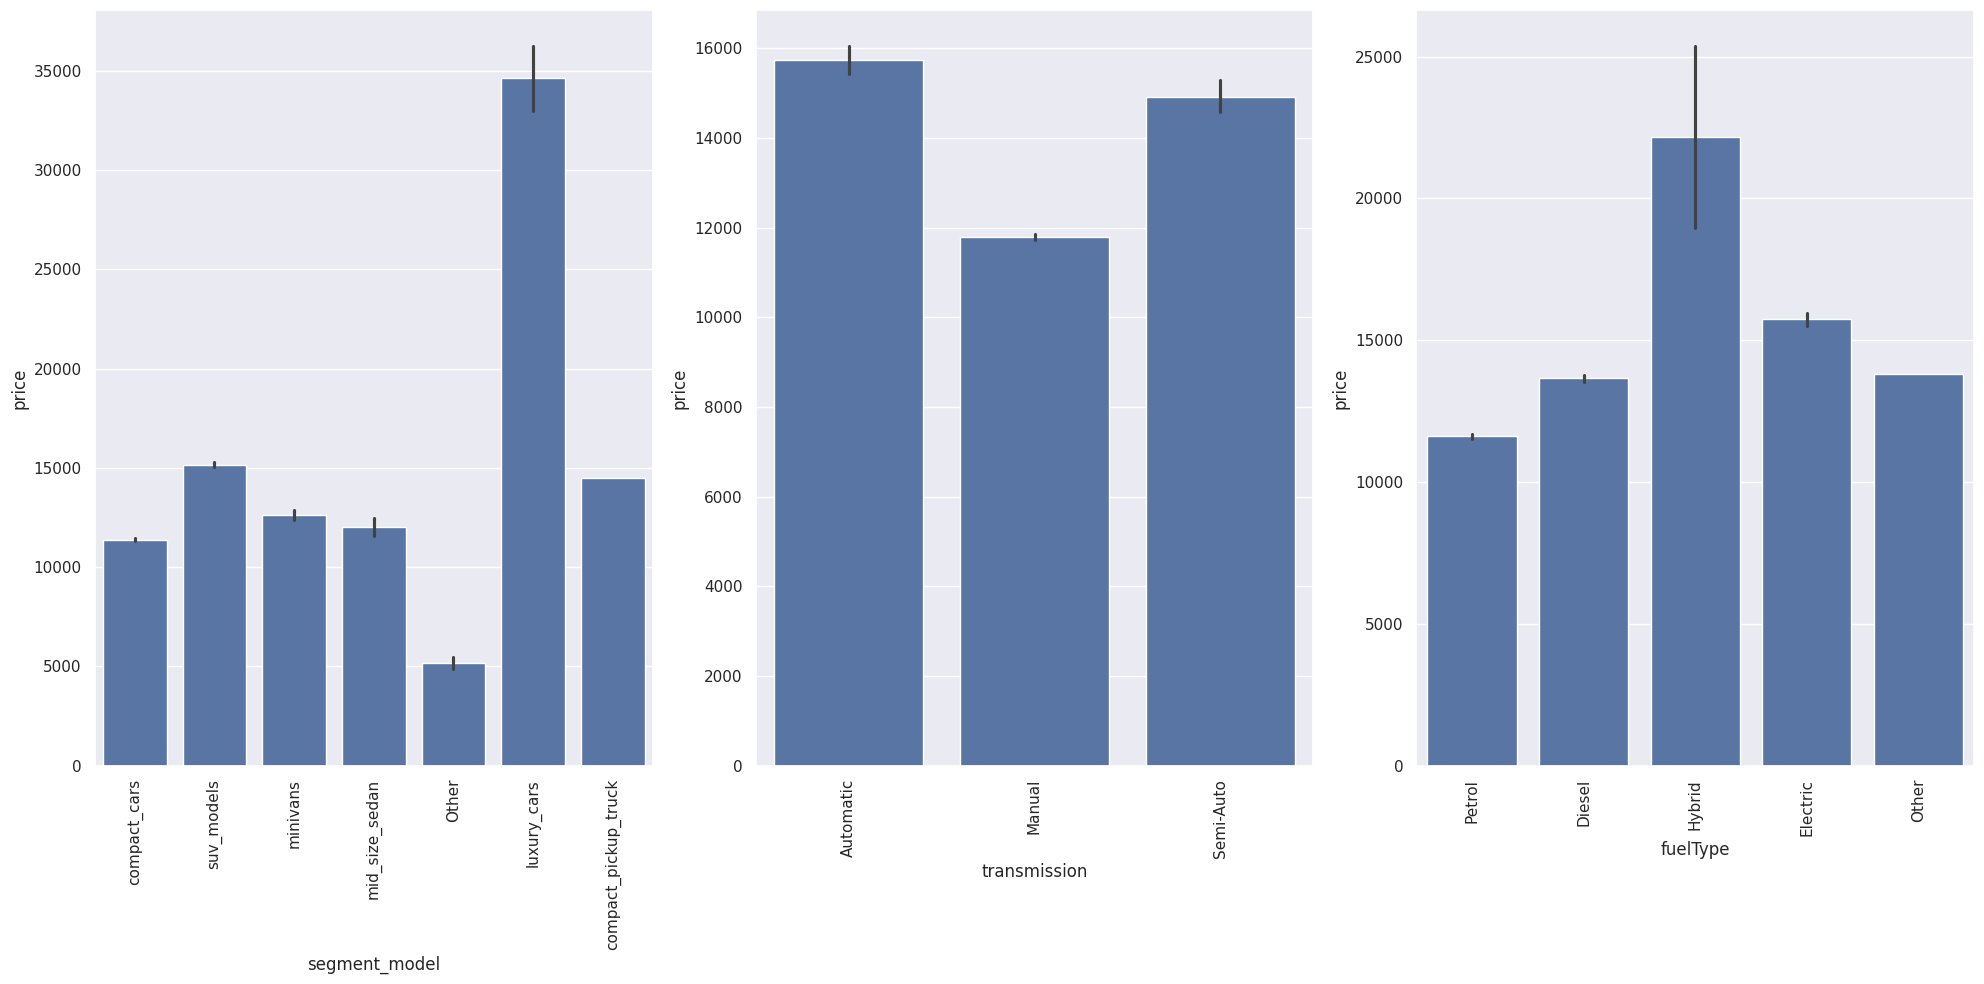

In [ ]:
cat_vars=['segment_model','transmission','fuelType']

num_cols=len(cat_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(20,10*num_rows))
axs=axs.flatten()

for i,var in enumerate (cat_vars):
  sns.barplot(x=var,y='price',data=df,ax=axs[i],estimator=np.mean)
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

fig.tight_layout()
plt.show()

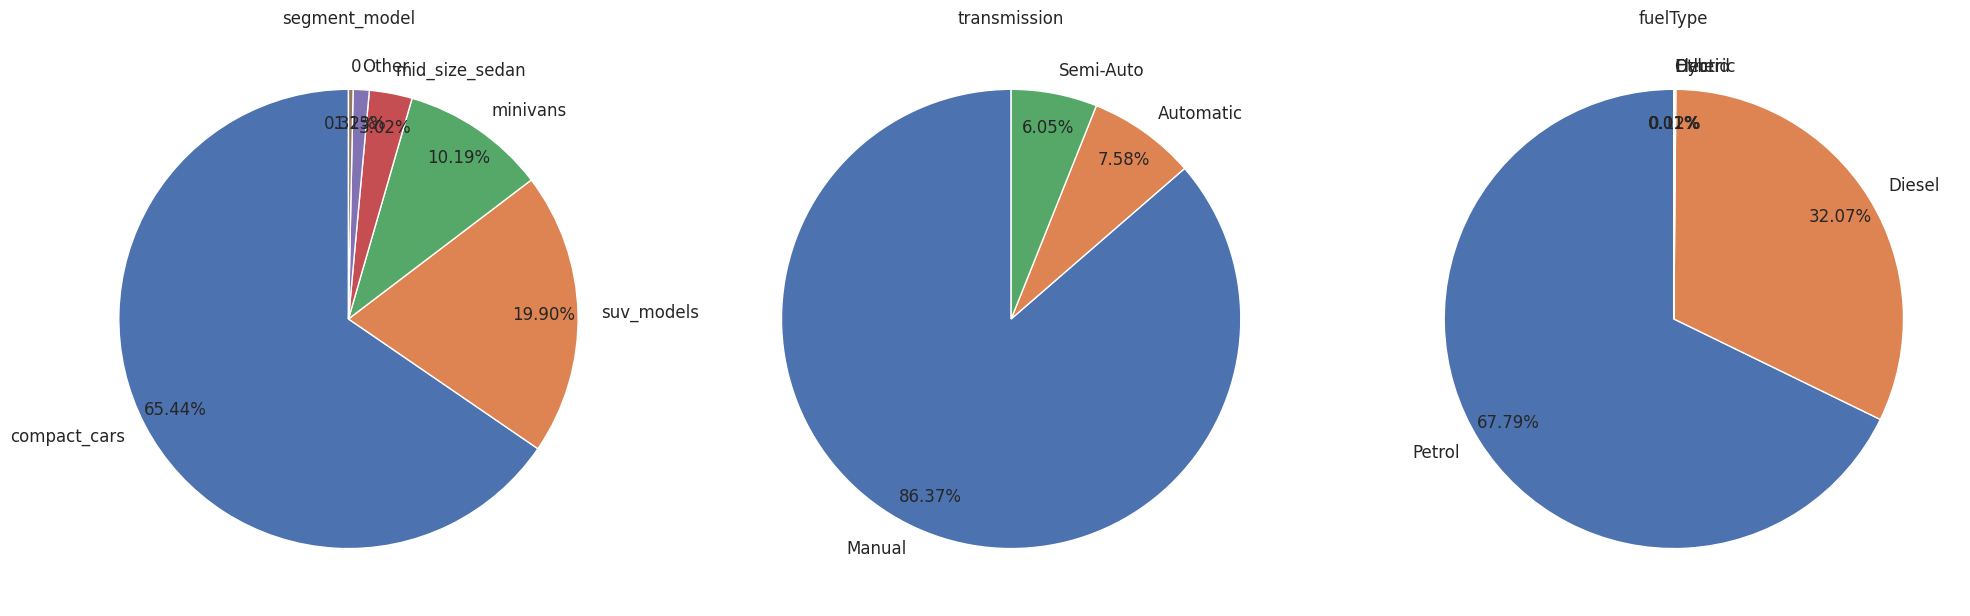

In [ ]:
cat_vars=['segment_model','transmission','fuelType']
max_categories=5

num_cols=len(cat_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(20,10*num_rows))
axs=axs.flatten()

for i,var in enumerate (cat_vars):
  if i < len(axs):
    cat_counts=df[var].value_counts()

    if len(cat_counts) > max_categories:
      cat_counts_top=cat_counts[:max_categories]
      cat_counts_other=pd.Series(cat_counts[max_categories:].sum())
      cat_counts=pd.concat([cat_counts_top,cat_counts_other])
    axs[i].pie(x=cat_counts,labels=cat_counts.index,autopct="%1.2f%%",startangle=90,pctdistance=0.85,labeldistance=1.1,
                textprops={'fontsize': 12})
    axs[i].set_title(var)

fig.tight_layout()
plt.show()

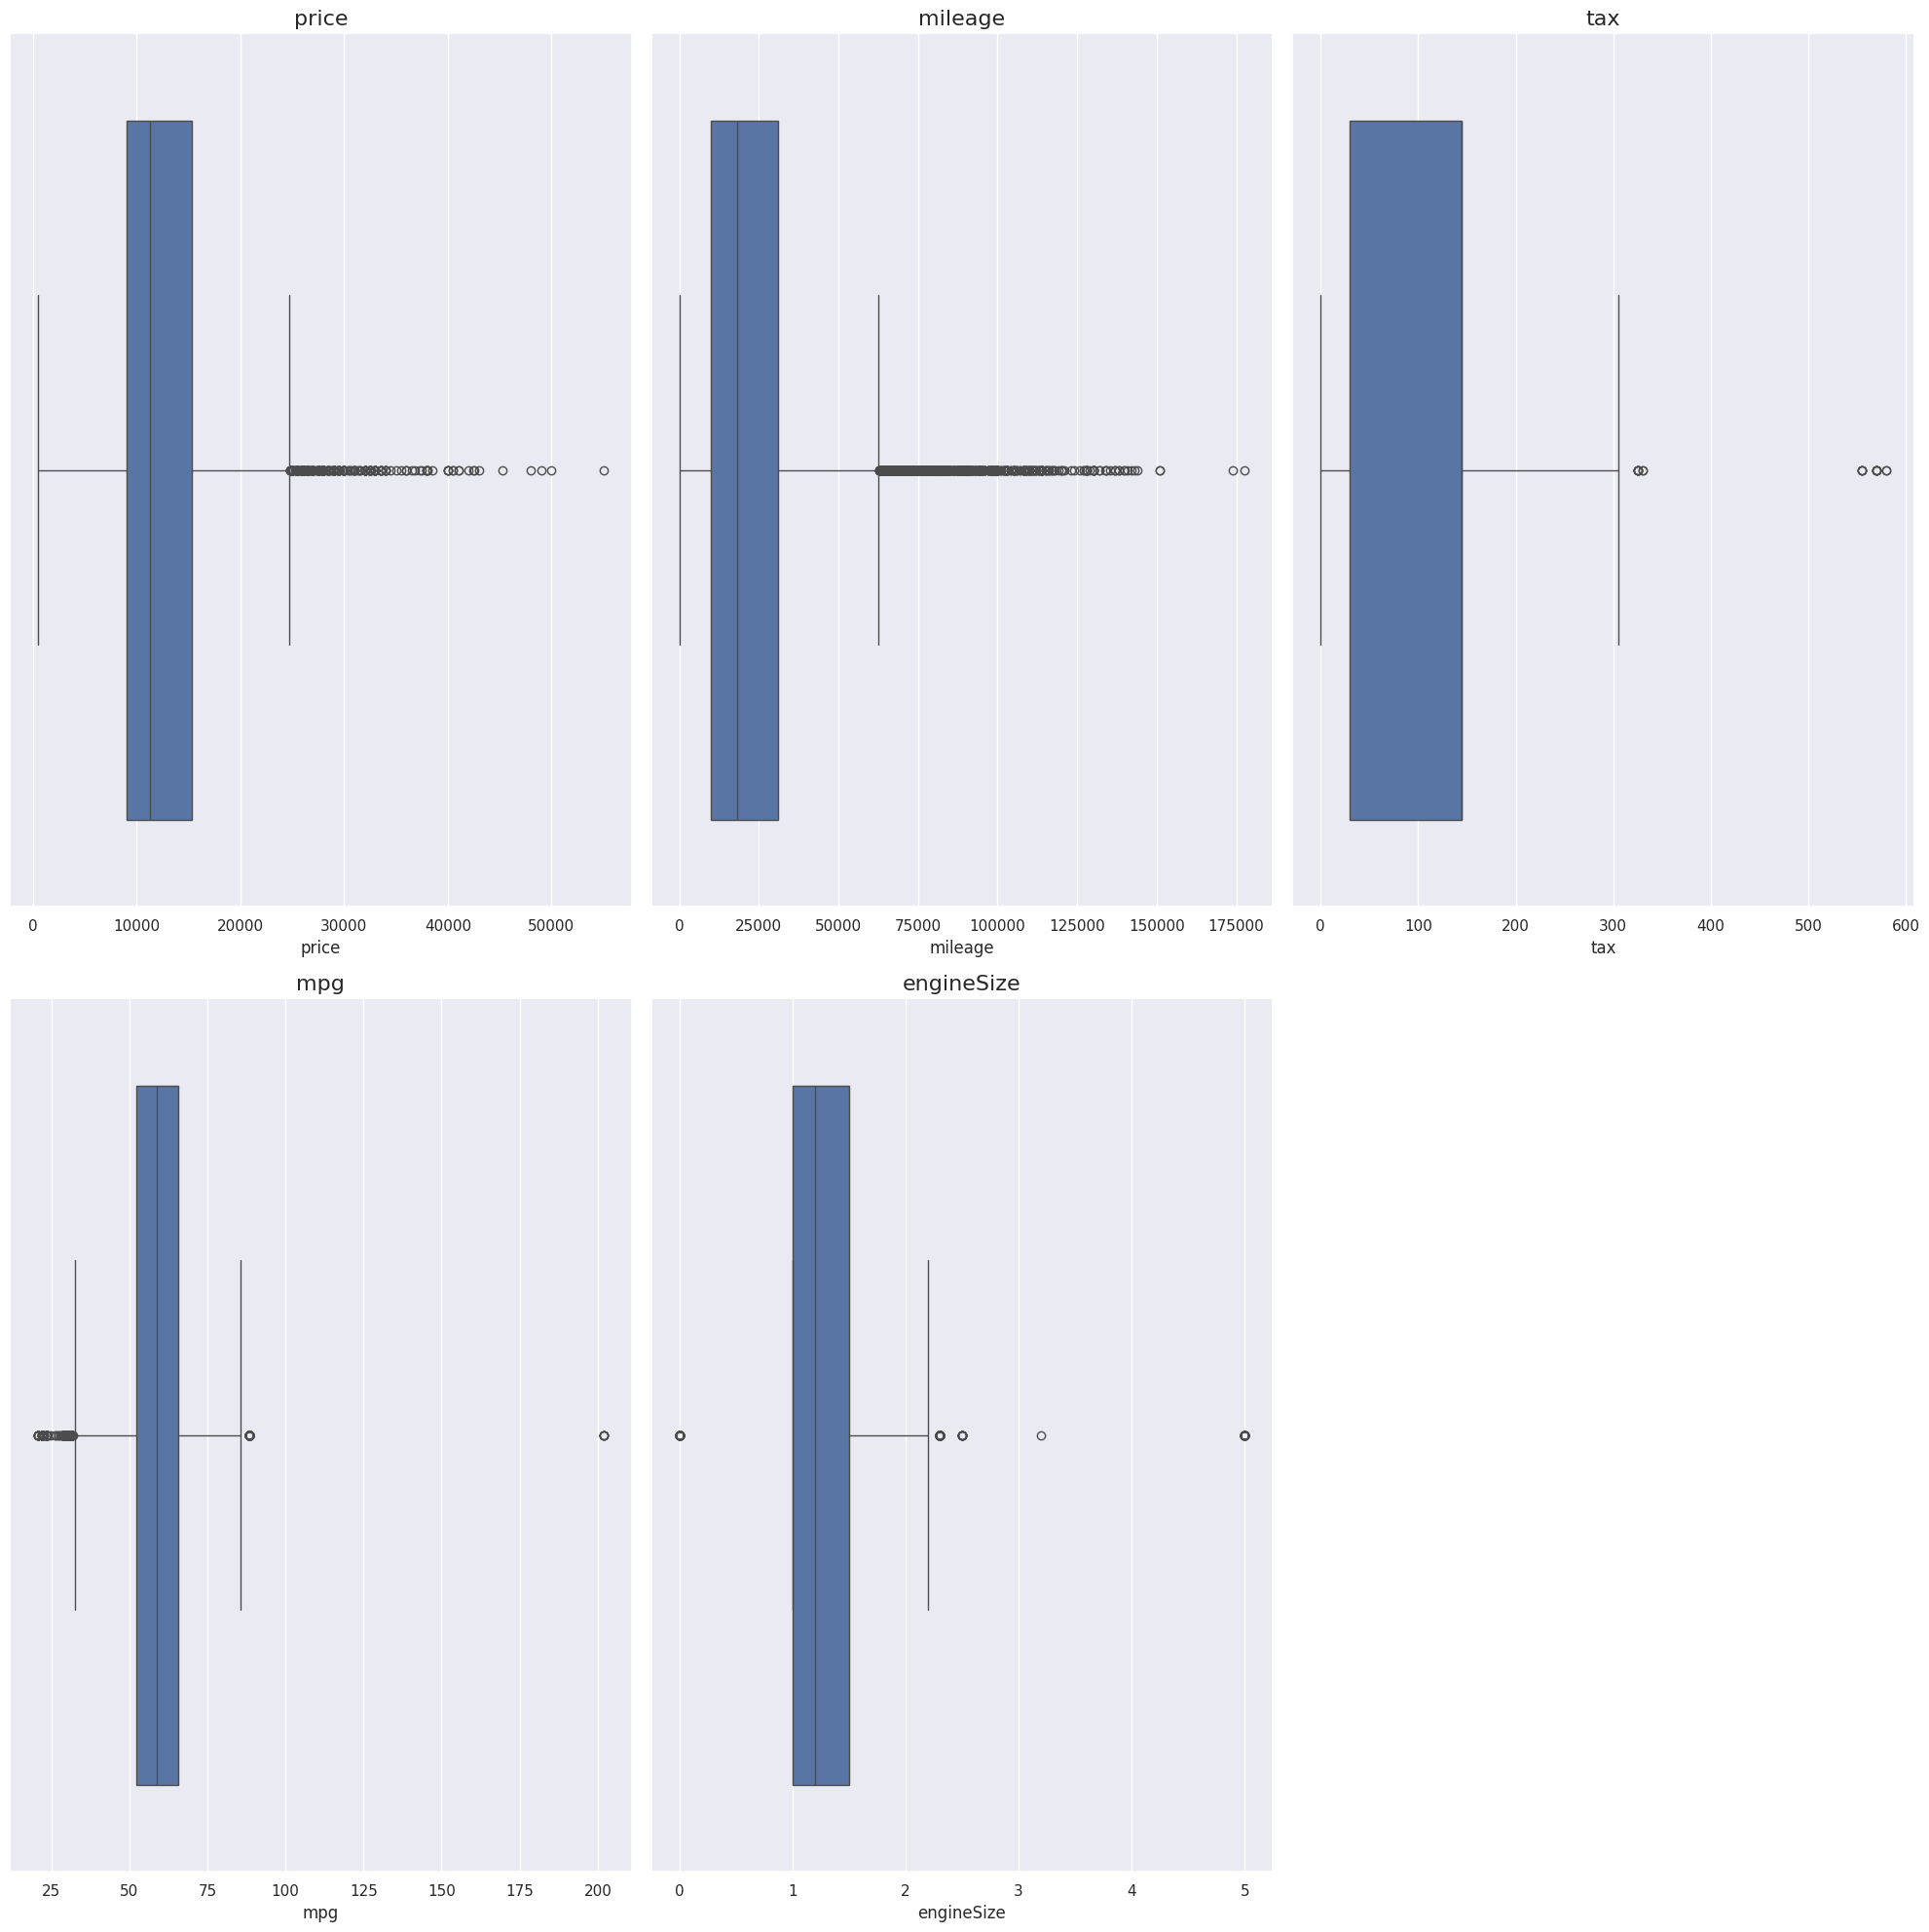

In [ ]:
num_vars=df.select_dtypes(include=['int','float']).columns.tolist()
num_vars.remove('year')

num_cols=len(num_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(20,10*num_rows))
axs=axs.flatten()

for i,var in enumerate(num_vars):
  sns.boxplot(x=var,data=df,ax=axs[i])
  axs[i].set_title(var,fontsize=16)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

<ipython-input-176-e0758ca421fa>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=45)
<ipython-input-176-e0758ca421fa>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=45)
<ipython-input-176-e0758ca421fa>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=45)
<ipython-input-176-e0758ca421fa>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=45)
<ipython-input-176-e0758ca421fa>:12: UserWarning: set_ticklabels() should only be used w

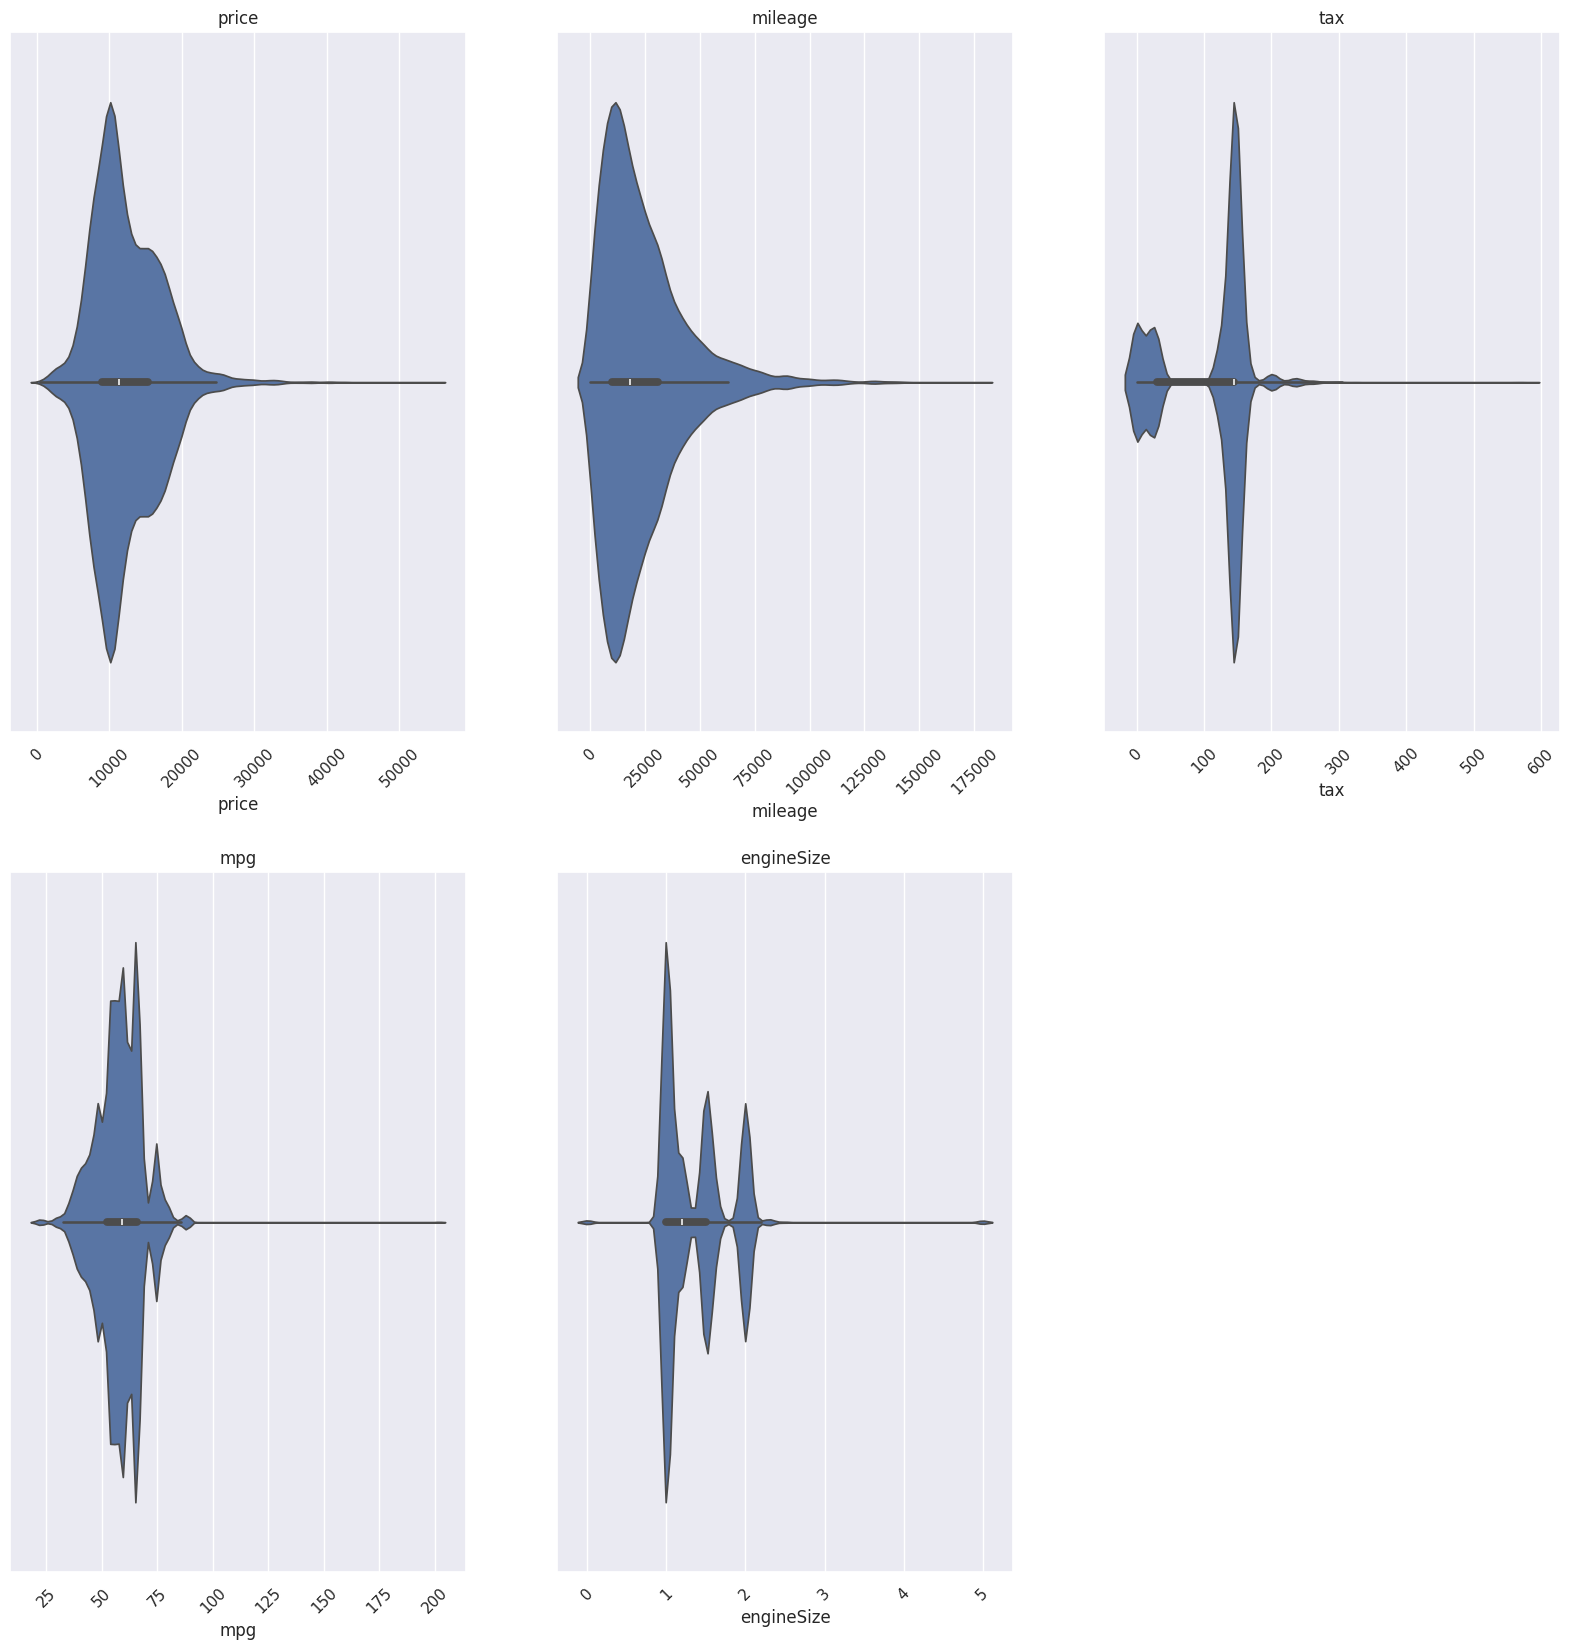

In [ ]:
num_vars=df.select_dtypes(include=['int','float']).columns.tolist()
num_vars.remove('year')

num_cols=len(num_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(20,10*num_rows))
axs=axs.flatten()

for i,var in enumerate(num_vars):
  sns.violinplot(x=var,data=df,ax=axs[i])
  axs[i].set_title(var)
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=45)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

plt.show()

<ipython-input-177-e493bdebb0c4>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=45)
<ipython-input-177-e493bdebb0c4>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=45)
<ipython-input-177-e493bdebb0c4>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=45)
<ipython-input-177-e493bdebb0c4>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=45)
<ipython-input-177-e493bdebb0c4>:12: UserWarning: set_ticklabels() should only be used w

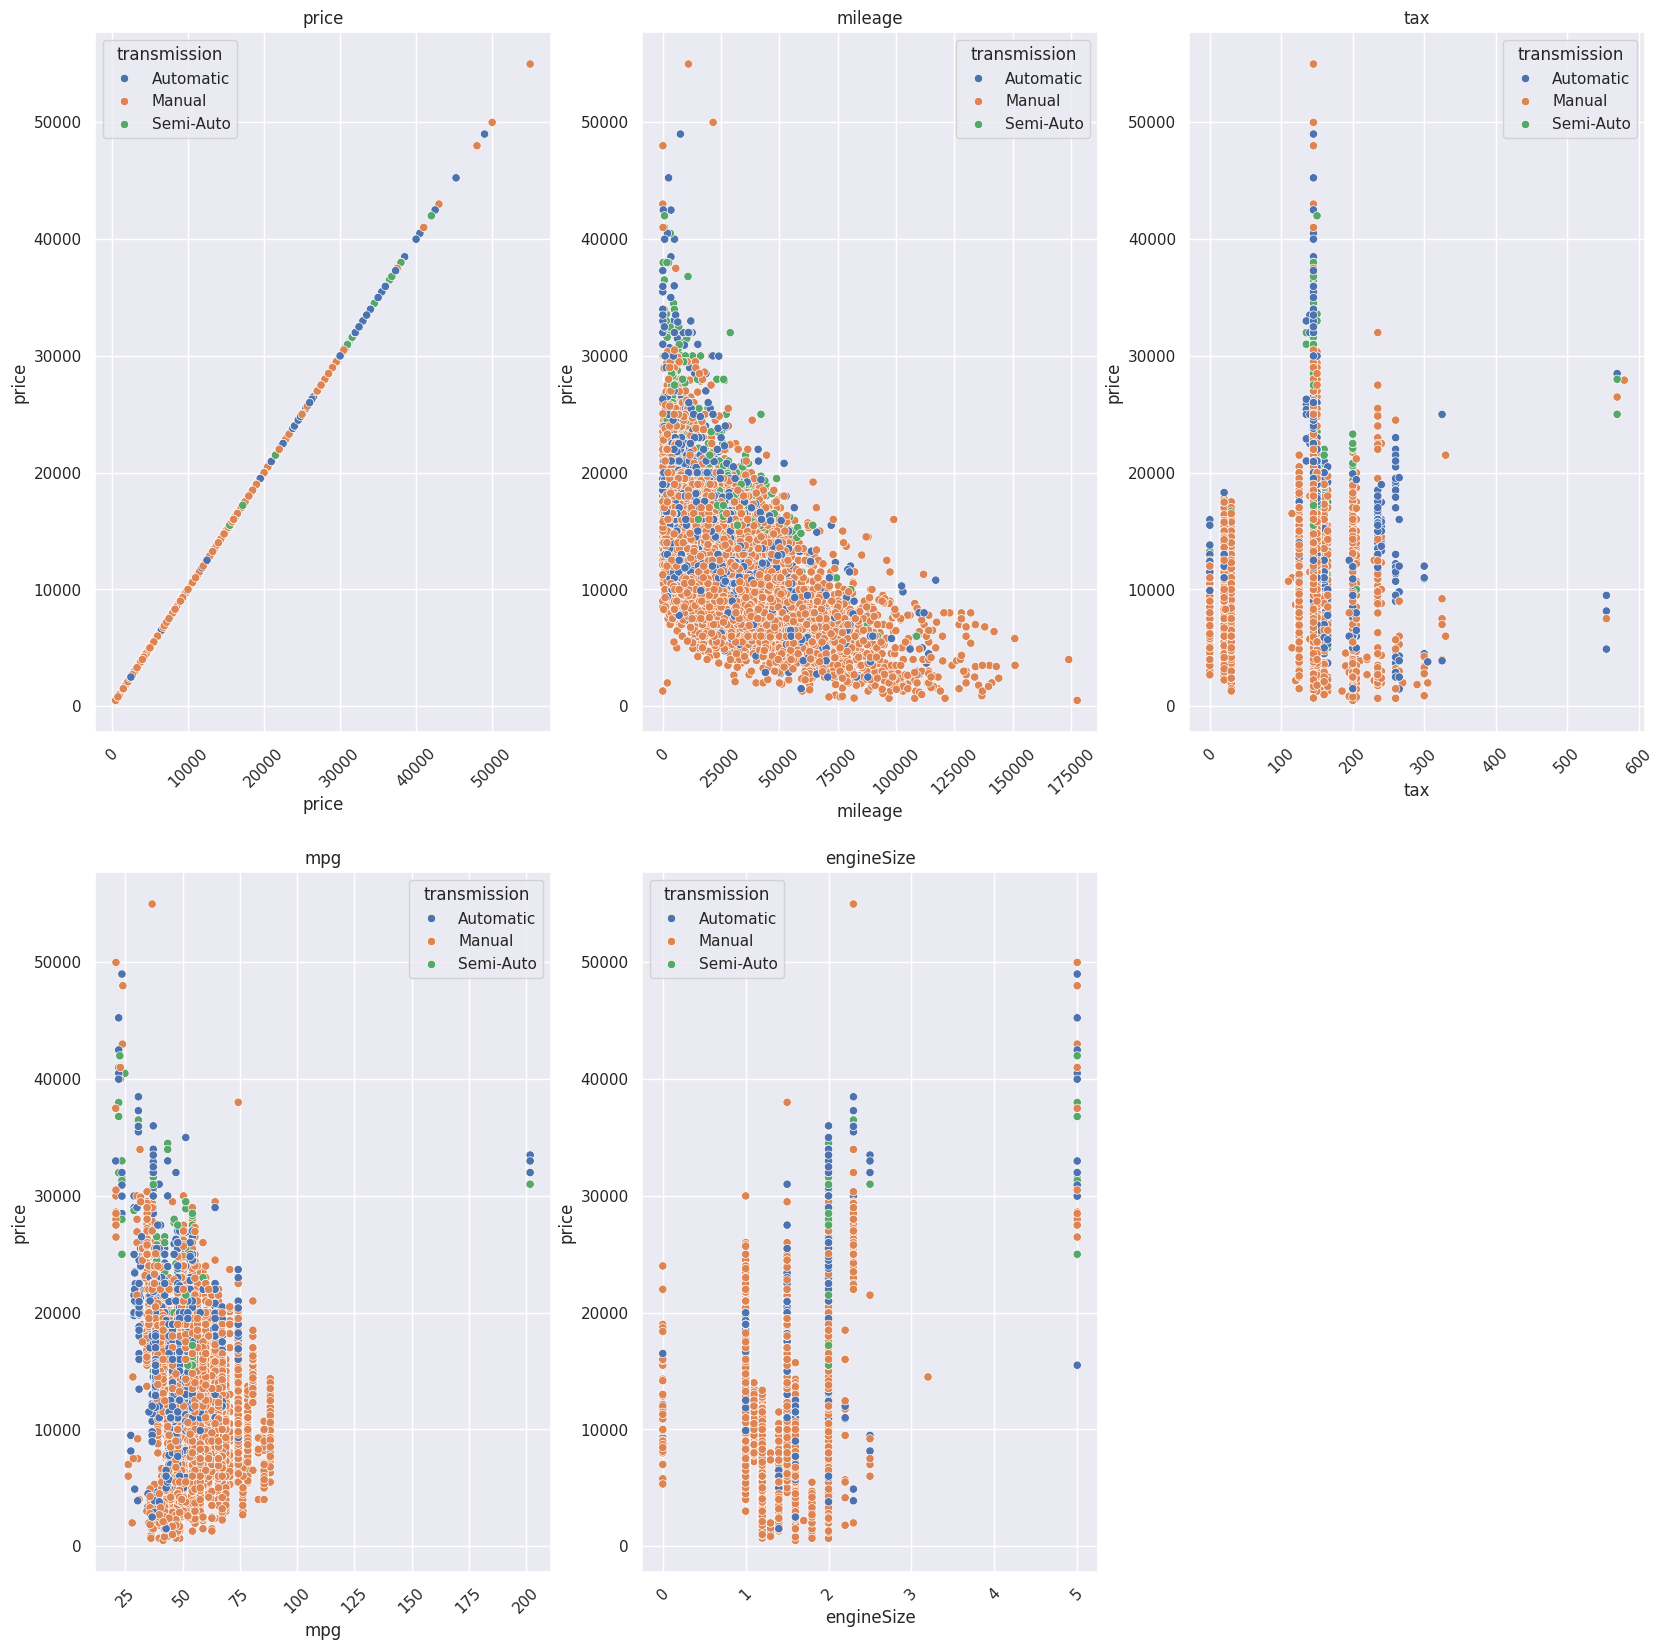

In [ ]:
num_vars=df.select_dtypes(include=['int','float']).columns.tolist()
num_vars.remove('year')

num_cols=len(num_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(20,10*num_rows))
axs=axs.flatten()

for i,var in enumerate(num_vars):
  sns.scatterplot(x=var,y='price',hue='transmission',data=df,ax=axs[i])
  axs[i].set_title(var)
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=45)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

plt.show()

<ipython-input-178-ad01c99824f4>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=45)
<ipython-input-178-ad01c99824f4>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=45)
<ipython-input-178-ad01c99824f4>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=45)
<ipython-input-178-ad01c99824f4>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=45)
<ipython-input-178-ad01c99824f4>:12: UserWarning: set_ticklabels() should only be used w

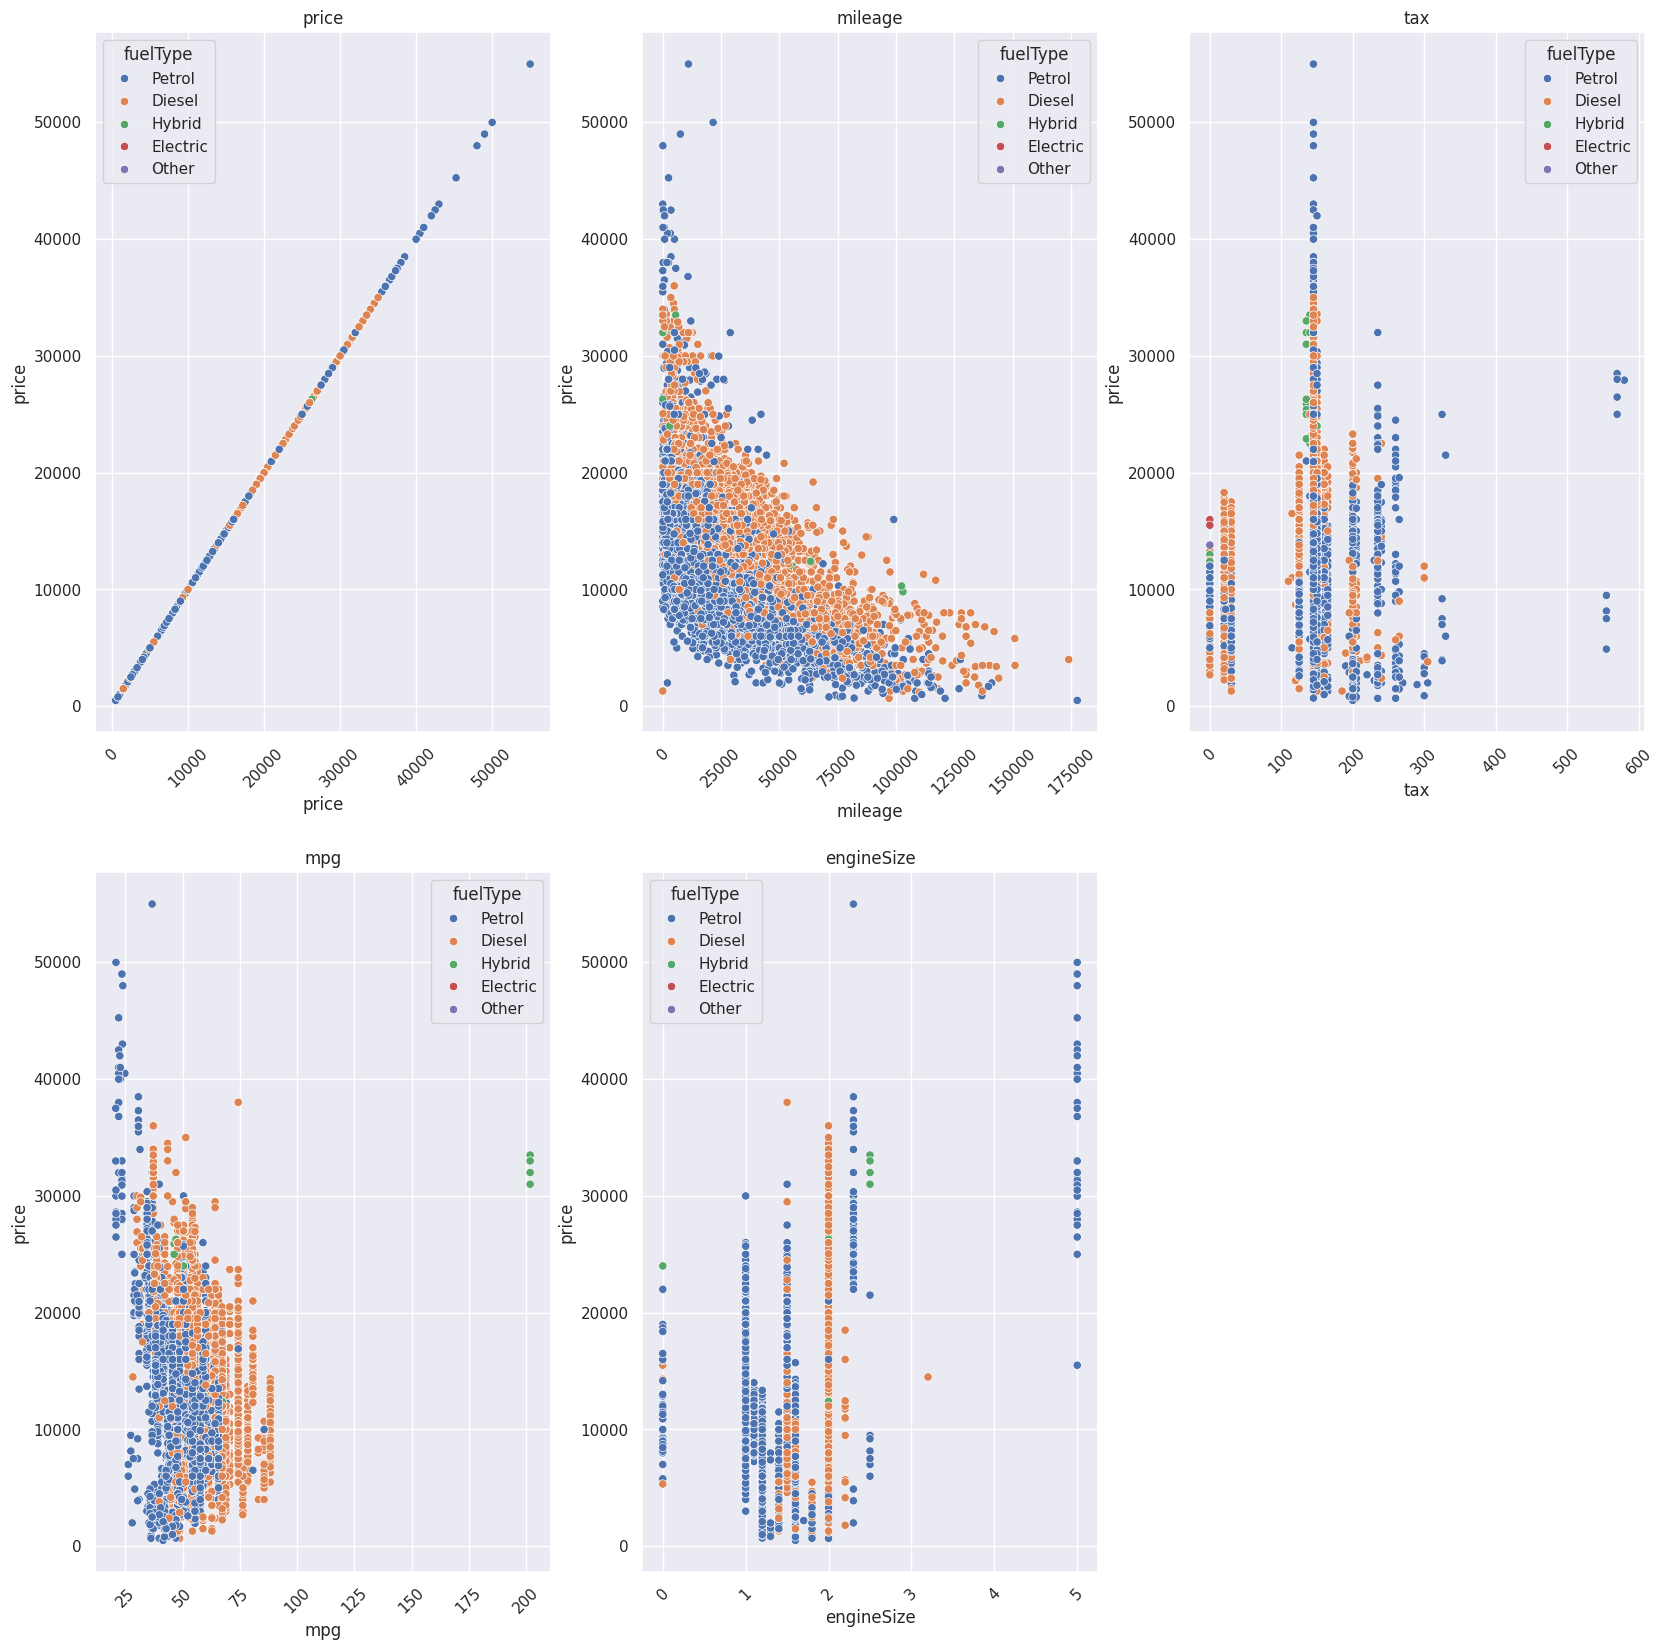

In [ ]:
num_vars=df.select_dtypes(include=['int','float']).columns.tolist()
num_vars.remove('year')

num_cols=len(num_vars)
num_rows=(num_cols +2)//3
fig,axs=plt.subplots(nrows=num_rows,ncols=3,figsize=(20,10*num_rows))
axs=axs.flatten()

for i,var in enumerate(num_vars):
  sns.scatterplot(x=var,y='price',hue='fuelType',data=df,ax=axs[i])
  axs[i].set_title(var)
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=45)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

plt.show()

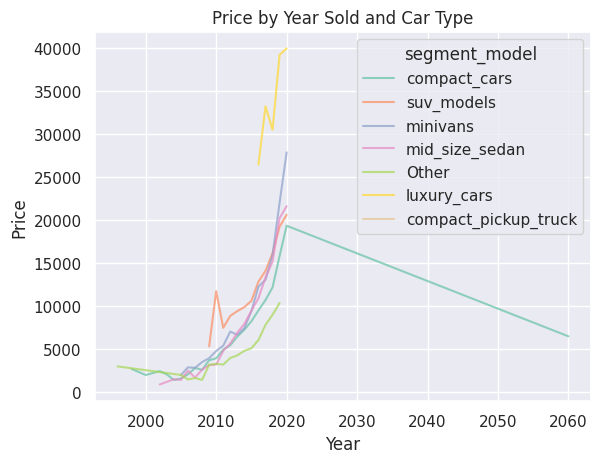

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.lineplot(x='year',y='price',hue='segment_model',data=df,estimator='mean',alpha=0.7,errorbar=None)

plt.title('Price by Year Sold and Car Type')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

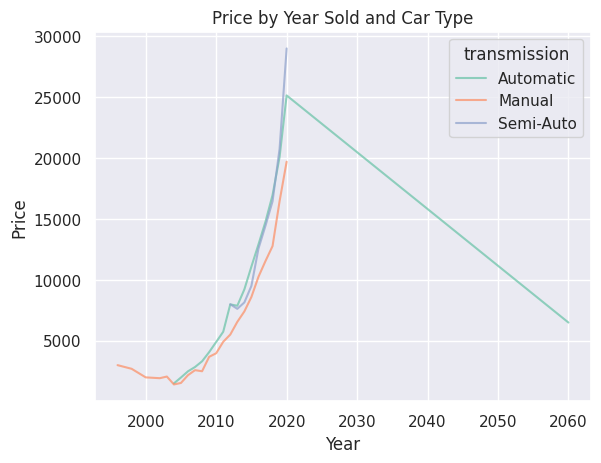

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.lineplot(x='year',y='price',hue='transmission',data=df,estimator='mean',alpha=0.7,errorbar=None)

plt.title('Price by Year Sold and Car Type')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

# Data Preprocessing Part 2

In [ ]:
df.shape

(17966, 10)

In [ ]:
df=df[df['year'] <=2023]
df.shape

(17965, 10)

In [ ]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0
segment_model,0


In [ ]:
df=df.drop(columns=['model'],axis=1)
df

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,segment_model
0,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,compact_cars
1,2018,14000,Manual,9083,Petrol,150,57.7,1.0,compact_cars
2,2017,13000,Manual,12456,Petrol,150,57.7,1.0,compact_cars
3,2019,17500,Manual,10460,Petrol,145,40.3,1.5,compact_cars
4,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,compact_cars
...,...,...,...,...,...,...,...,...,...
17961,2017,8999,Manual,16700,Petrol,150,47.1,1.4,minivans
17962,2014,7499,Manual,40700,Petrol,30,57.7,1.0,minivans
17963,2015,9999,Manual,7010,Diesel,20,67.3,1.6,compact_cars
17964,2018,8299,Manual,5007,Petrol,145,57.7,1.2,Other


In [ ]:
df['price'].max()

26500

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

encoder=LabelEncoder()
scaler=MinMaxScaler()

for i in df.select_dtypes(include='object').columns:
  df[i]=encoder.fit_transform(df[i])

In [ ]:
kolom=df.select_dtypes(include=['int','float']).columns
df[kolom]=scaler.fit_transform(df[kolom])

<Axes: >

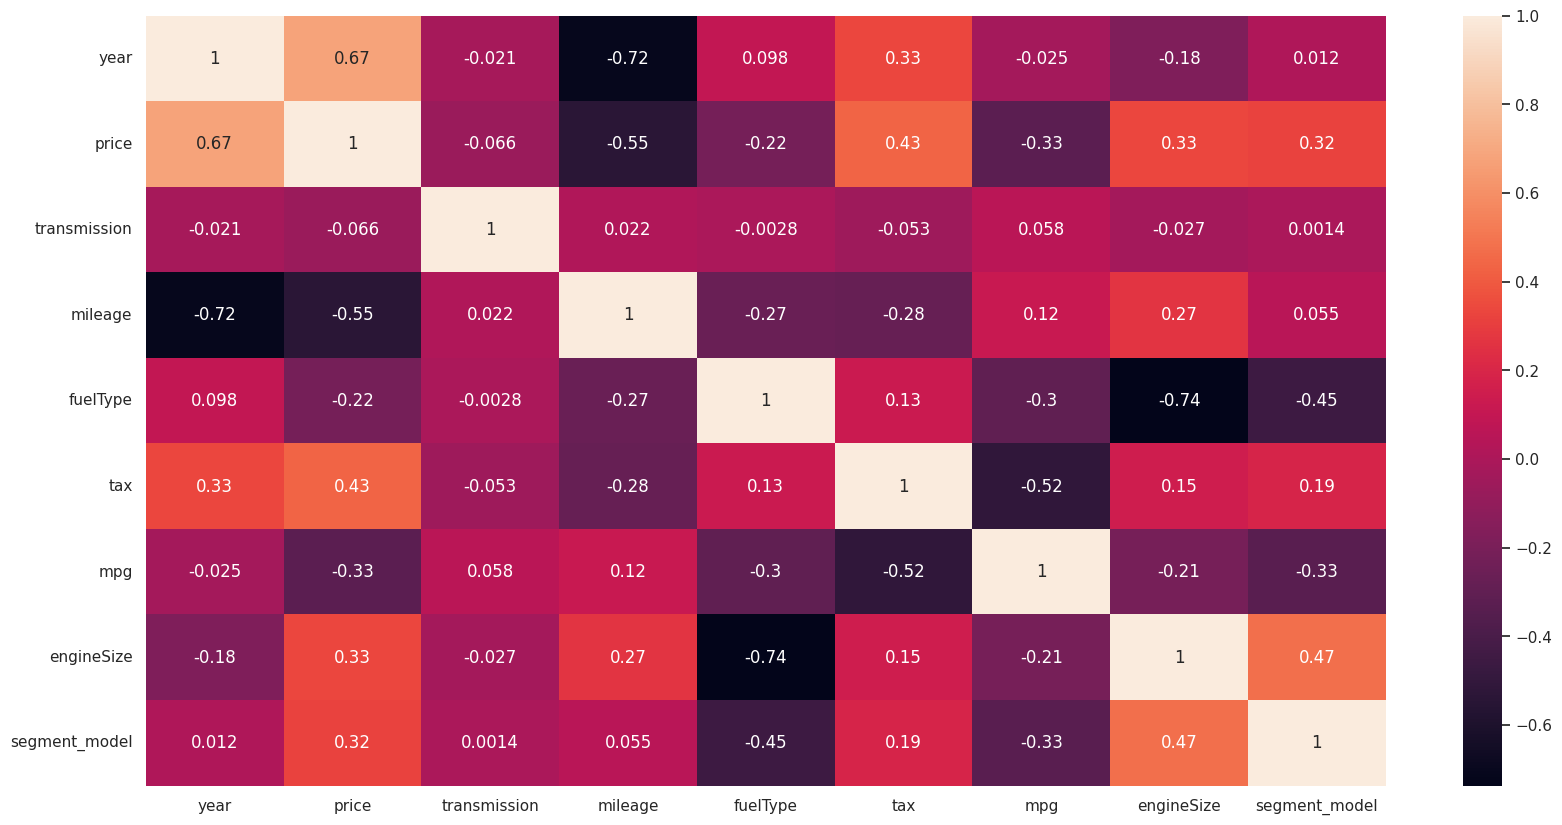

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),fmt='.2g',annot=True)

In [ ]:
# remove outlier

from scipy import stats

selected_columns=['tax','price','mpg']
zscore=np.abs(stats.zscore(df[selected_columns]))

outlier_indices=np.where(zscore > 3)[0]
df=df.drop(df.index[outlier_indices])
df

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,segment_model
0,0.875000,0.442415,0.0,0.089747,1.0,0.517241,0.513089,0.20,0.166667
1,0.916667,0.519323,0.5,0.051125,1.0,0.517241,0.513089,0.20,0.166667
2,0.875000,0.480869,0.5,0.070113,1.0,0.517241,0.513089,0.20,0.166667
3,0.958333,0.653913,0.5,0.058877,1.0,0.500000,0.209424,0.30,0.166667
4,0.958333,0.615459,0.0,0.008337,1.0,0.500000,0.356021,0.20,0.166667
...,...,...,...,...,...,...,...,...,...
17961,0.875000,0.327014,0.5,0.094003,1.0,0.517241,0.328098,0.28,0.833333
17962,0.750000,0.269333,0.5,0.229106,1.0,0.103448,0.513089,0.20,0.833333
17963,0.791667,0.365468,0.5,0.039456,0.0,0.068966,0.680628,0.32,0.166667
17964,0.916667,0.300096,0.5,0.028180,1.0,0.500000,0.513089,0.24,0.000000


# Model Building

In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='price',axis=1)
y=df['price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

ada=AdaBoostRegressor(DecisionTreeRegressor(max_depth=1))
param_grid=({
    'learning_rate':[0.1,0.001,1],
    'n_estimators':[100,50,200],
})
grid=GridSearchCV(ada,param_grid,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'learning_rate': 1, 'n_estimators': 50}


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada=AdaBoostRegressor(DecisionTreeRegressor(max_depth=1),n_estimators=50,learning_rate=1,random_state=42)
ada.fit(X_train,y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1), learning_rate=1,
                  random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

y_pred=ada.predict(X_test)
mse=mean_absolute_error(y_test,y_pred)
mae=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MSE:',mse)
print('MAE:',mae)
print('r2:',r2)

MSE: 0.09968311597912492
MAE: 0.013967212344405289
r2: 0.46849529176997184


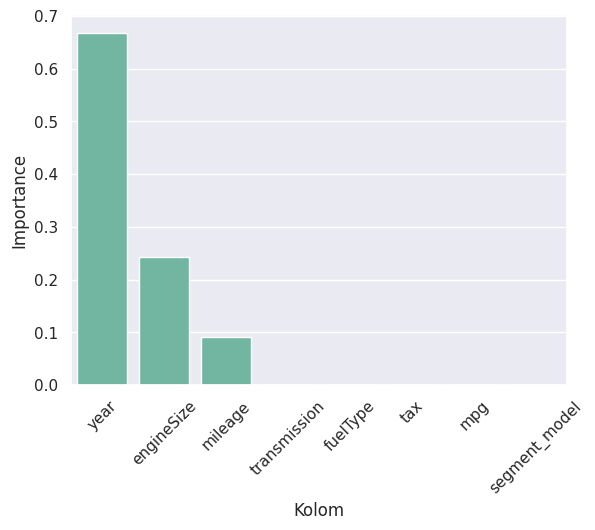

In [ ]:
imp_df=pd.DataFrame({
    'Kolom':X_train.columns,
    'Importance':ada.feature_importances_
})
imp=imp_df.nlargest(10,'Importance')
sns.barplot(x='Kolom',y='Importance',data=imp)
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(max_depth=6,min_samples_leaf=3,min_samples_split=8,random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=8,
                      random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

y_pred=rf.predict(X_test)
mse=mean_absolute_error(y_test,y_pred)
mae=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MSE:',mse)
print('MAE:',mae)
print('r2:',r2)

MSE: 0.04550030862203039
MAE: 0.0036205451484132792
r2: 0.8622247055969006


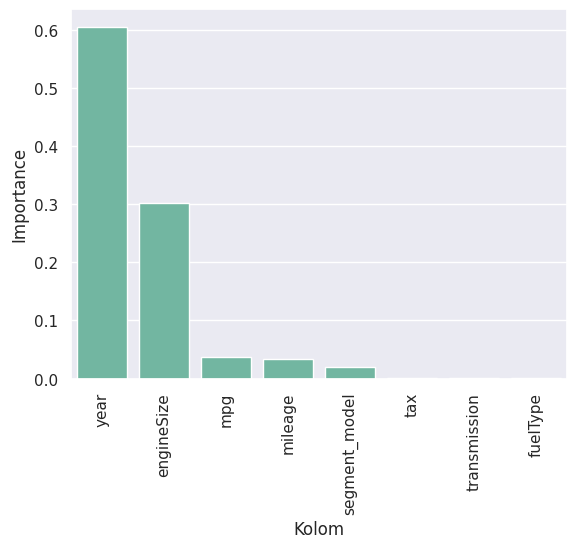

In [ ]:
imp_df=pd.DataFrame({
    'Kolom':X_train.columns,
    'Importance':rf.feature_importances_
})
top_imp=imp_df.nlargest(10,'Importance')
sns.barplot(x='Kolom',y='Importance',data=top_imp)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb=XGBRegressor()
param_grid=({
    'learning_rate':[0.1,0.001,1],
    'n_estimators':[100,50,200],
    'max_depth':[2,3,5],
})
grid=GridSearchCV(xgb,param_grid,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [ ]:
xgb=XGBRegressor(learning_rate=0.1,max_depth=5,n_estimators=200)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

y_pred=xgb.predict(X_test)
mse=mean_absolute_error(y_test,y_pred)
mae=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MSE:',mse)
print('MAE:',mae)
print('r2:',r2)

MSE: 0.032020289254235265
MAE: 0.0019331453631971991
r2: 0.9264365832711117


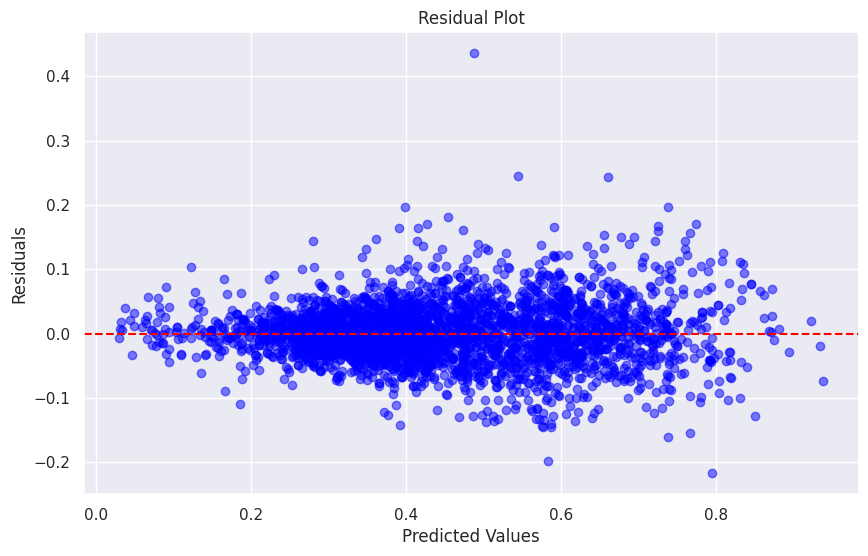

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
